# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to wrtie neural netowrks for classification

A classification is where you try to calssify something as one thing or another

A few types to classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 circles
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is a little hard to understand right now... let's visualize it!

In [5]:
import pandas as pd

circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:,1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


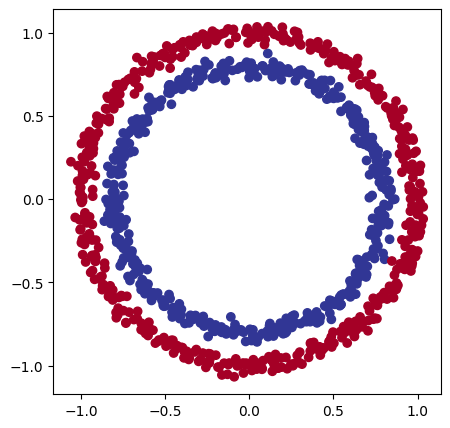

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first examples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tune the model

In [10]:
# Import TensorFlow
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='sgd',
              metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.6416 - accuracy: 0.4660
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.5010
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4830
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4840
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4930


In [11]:
# Let's try and improve our model by training for longer..
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy, it's performing as if it's guessing.

So, let's add an extra layer

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer='sgd',
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5000


[0.6940690875053406, 0.5]

## Improving our model

Let's look into how to improve the model.

1. Create a model - add more layers/ increase number of hidden units within a layer
2. Compile the model - choose a different optimization function such as Adam instead of SGD
3. Fit the model - fit our models for more epochs (leave it for training for longer)

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (increase to 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5090


[0.6982755661010742, 0.5090000033378601]

To visualize our model's predictions, let's create a function `plot_decision_boudary`, this function will:

* Take in a trained model, features(X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the mesh grid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [14]:
import numpy as np

def plot_decision_boundary(model, X, y):
    '''
    Plots the decision boundaries of the plot and create a meshgrid
    '''
    
    # Define the axis boudnaries of the plot and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2 arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print('Doing multiclass classification')
        # We have to reshape our prediction to get them ready
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('Doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Doing binary classification


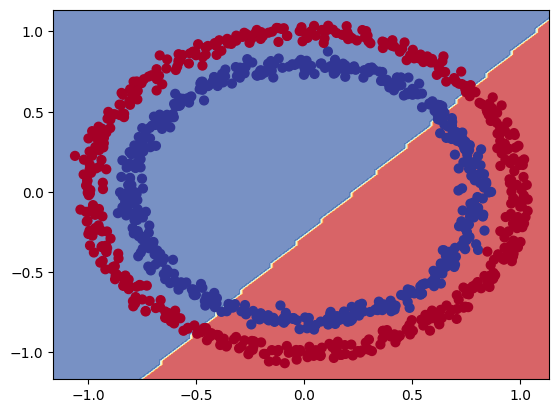

In [15]:
# Check out predicitons our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

In [16]:
# Let's see if our model can be used for a regression problem...

# Set seed
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split regression data into train and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train[..., tf.newaxis], y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\andyc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\andyc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\andyc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\andyc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\andyc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\andyc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


OH wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data

In [17]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer='adam',
                metrics=['mae'])

# 3. Fit the model 
# if input data is of shape(200, ) => need to expand the dimensions by 1 to becomes (200, 1)
model_3.fit(X_reg_train[..., tf.newaxis], y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 451.7000 - mae: 451.7000
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 339.1842 - mae: 339.1842
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 232.5887 - mae: 232.5887
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 123.5613 - mae: 123.5613
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 48.9770 - mae: 48.9770
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 81.6664 - mae: 81.6664
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 74.4033 - mae: 74.4033
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0075 - mae: 47.0075
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 49.1674 - mae: 49.1674
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 45.2703 - mae: 45.2703
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 3ms/step


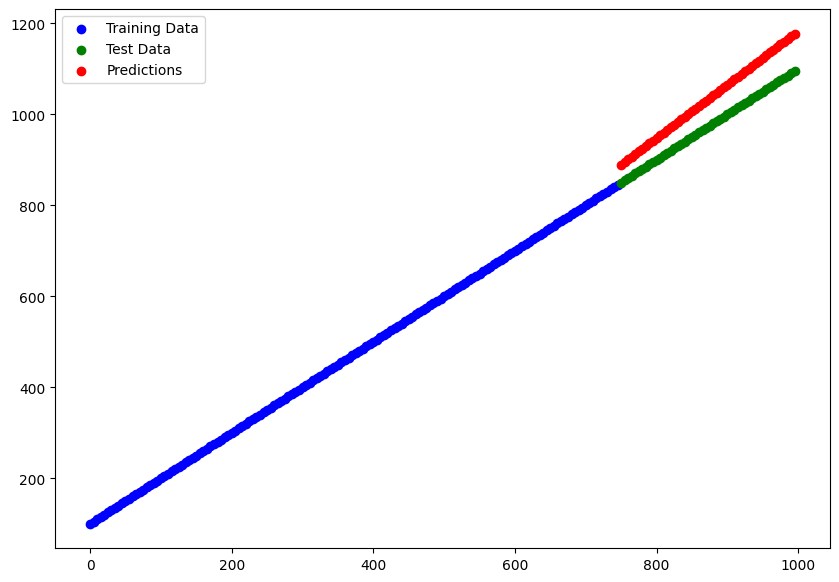

In [18]:
# Mkae predictions with our trained model
y_reg_pred = model_3.predict(X_reg_test)

# Plot the model's predictions against our regressions data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training Data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test Data')
plt.scatter(X_reg_test, y_reg_pred, c='r', label='Predictions')
plt.legend()

## The missing piece: Non-linearity

In [19]:
# Set randome seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear')
])

# 2. Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2940 - accuracy: 0.4540
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2384 - accuracy: 0.4560
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1913 - accuracy: 0.4540
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1572 - accuracy: 0.4590
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1097 - accuracy: 0.4640
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0696 - accuracy: 0.4640
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0054 - accuracy: 0.4670
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9834 - accuracy: 0.4670
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9638 - accuracy: 0.4700
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9398 - accuracy: 0.4710
Epoch 11/

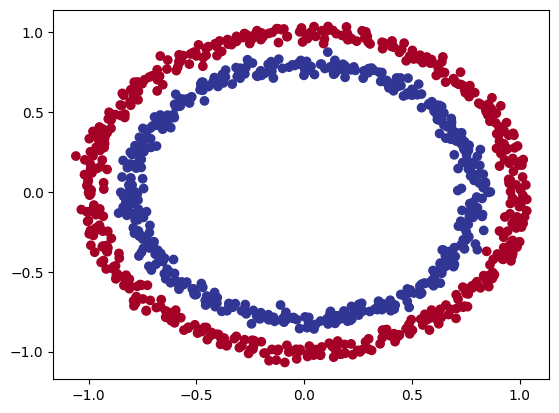

In [20]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
Doing binary classification


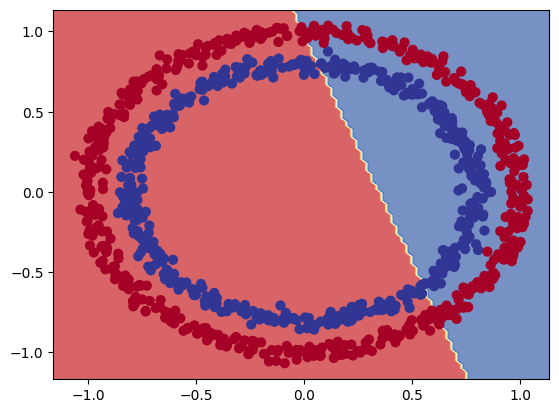

In [21]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_4, X=X, y=y)

Let's try to build our first neural network with a non-linear activation function 

In [22]:
# Set randome seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu')
])

# 2. Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.4422 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3821 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3118 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2644 - accuracy: 0.4760
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2269 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1726 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1133 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.0382 - accuracy: 0.4770
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9355 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8233 - accuracy: 0.4700
Epoch 11/

In [23]:
# Time to replicate the multi-layer neural network

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 0s 1ms/step
Doing binary classification


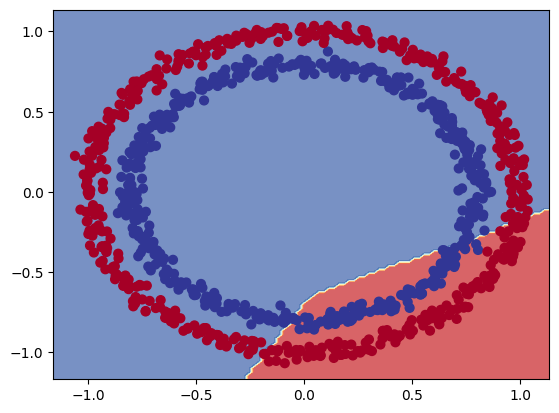

In [24]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [25]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7020 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5120
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5240
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5250
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5320
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.5400
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5450
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5520
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5570
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.5550
Epoch 11/

In [26]:
# 4. Evaluate model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1544 - accuracy: 0.9960


[0.15438321232795715, 0.9959999918937683]

313/313 [==============================] - 0s 1ms/step
Doing binary classification


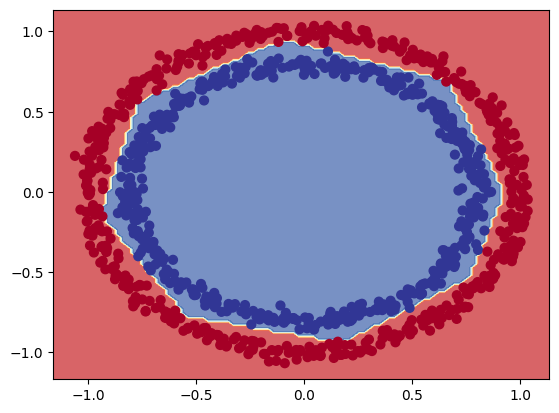

In [27]:
# Lets' visualize the model
plot_decision_boundary(model_7, X, y)

Now we've discussed the concept of linear and non-lienar functions, let's see them in action.

In [28]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

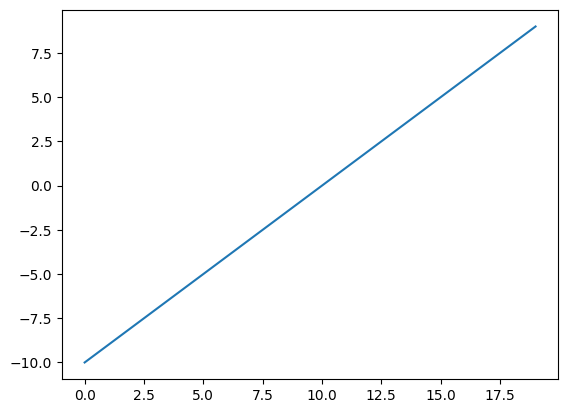

In [29]:
# Visualize toy tensor
plt.plot(A)

In [30]:
# Start by replicating sigmoid
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

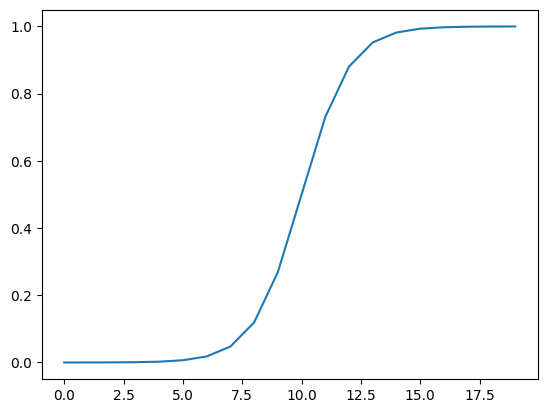

In [31]:
# Plot toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [32]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(x, 0)

# Pass our toy tensor into custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

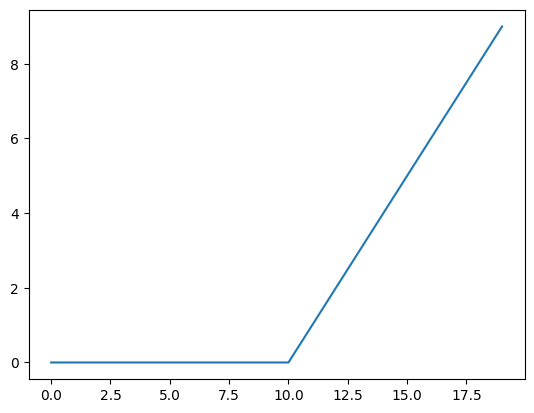

In [33]:
# Plot relu modified tensor
plt.plot(relu(A))

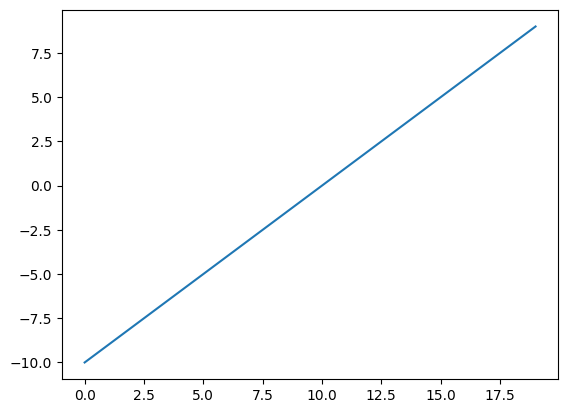

In [34]:
plt.plot(A)

In [35]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

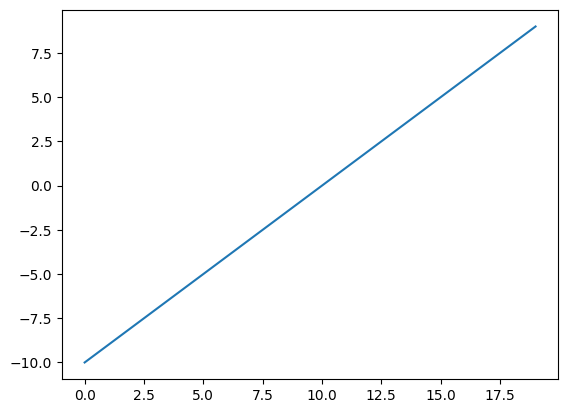

In [36]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

## Evaluating and improving our classification

So far we've been training and testing on the same dataset

However, in ML, it is basically a sin.

So, let's create a training and test set

In [37]:
# Check how many samples we have
len(X)

1000

In [38]:
# Split into trian and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [39]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6807 - accuracy: 0.5562
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.5838
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.5950
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.7075
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.6913
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.7175
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.8100
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5117 - accuracy: 0.8012
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.8487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.8725
Epoch 11/25
25/25 [

In [40]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 0.9850


[0.10058300197124481, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


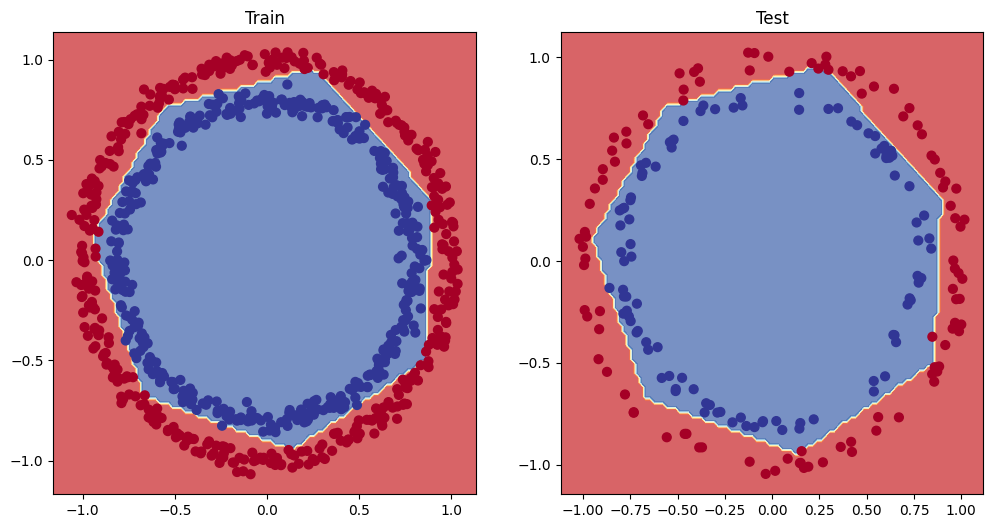

In [41]:
# Plot the decision boundaries for the training and est sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X_test, y_test)

## Plot the loss (or training) curves

In [42]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.680730,0.55625
1,0.668203,0.58375
2,0.655949,0.59500
3,0.637320,0.70750
4,0.613288,0.69125
5,0.581422,0.71750
6,0.539845,0.81000
7,0.511738,0.80125
8,0.470780,0.84875
9,0.437488,0.87250


Text(0.5, 1.0, 'Model_8 loss curves')

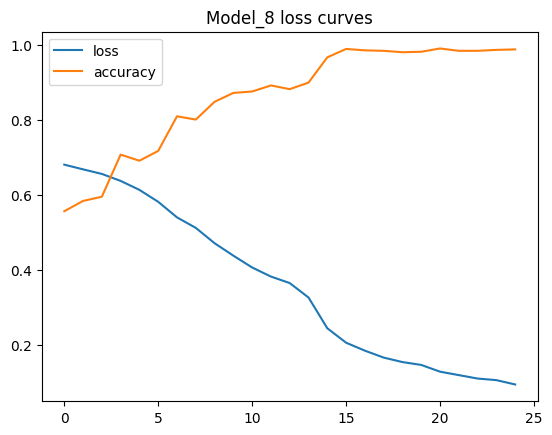

In [43]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

**Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting close to the ground truth labels)

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training), we're going to use the follow steps:
* A learning rate **callback** - can think of a callback as an extra piece of functionality that can be added to the model during training
* Another model (we could use the same one as above, but we're practicing building models)
* A modified loss curve plot

In [44]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scehduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4913 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4913 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4913 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4938 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4913 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4850 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4812 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4812 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<AxesSubplot: xlabel='epochs'>

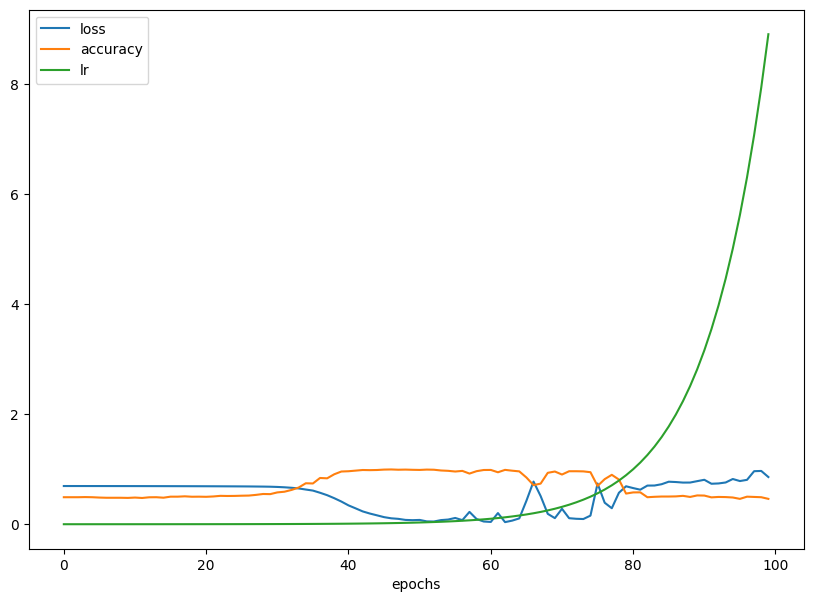

In [45]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel='epochs')

Text(0.5, 1.0, 'learning rate vs loss')

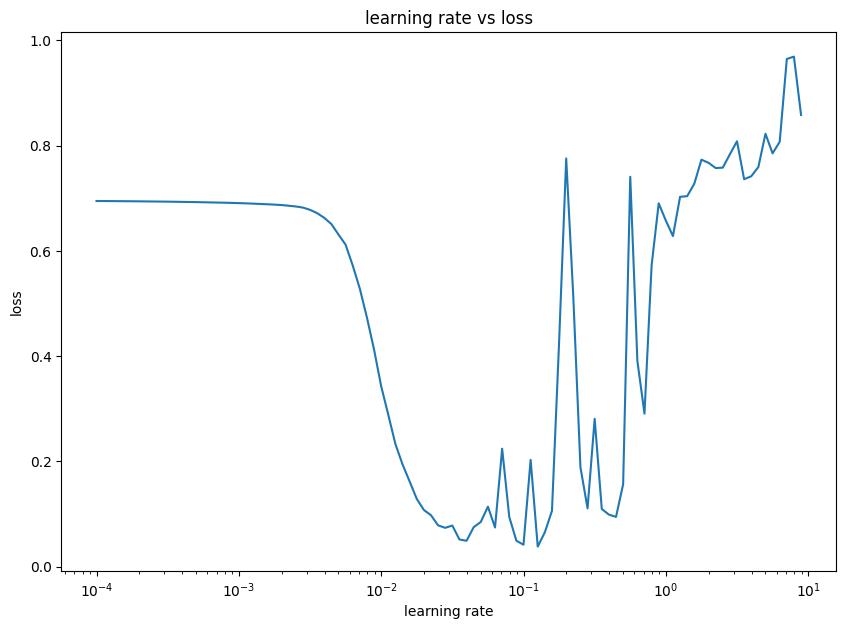

In [46]:
# Plot the leraning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learning rate vs loss')

In [47]:
# Example of other typical leraning rates values:
10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [48]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model with the ideal learning rate
model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

# 3. Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6996 - accuracy: 0.4825
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5150
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5350
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5537
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.5650
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.5800
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.6125
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.6812
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.7113
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.7862
Epoch 11/20
25/25 [

In [49]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0993 - accuracy: 0.9900


[0.09931442141532898, 0.9900000095367432]

In [50]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1006 - accuracy: 0.9850


[0.10058300197124481, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


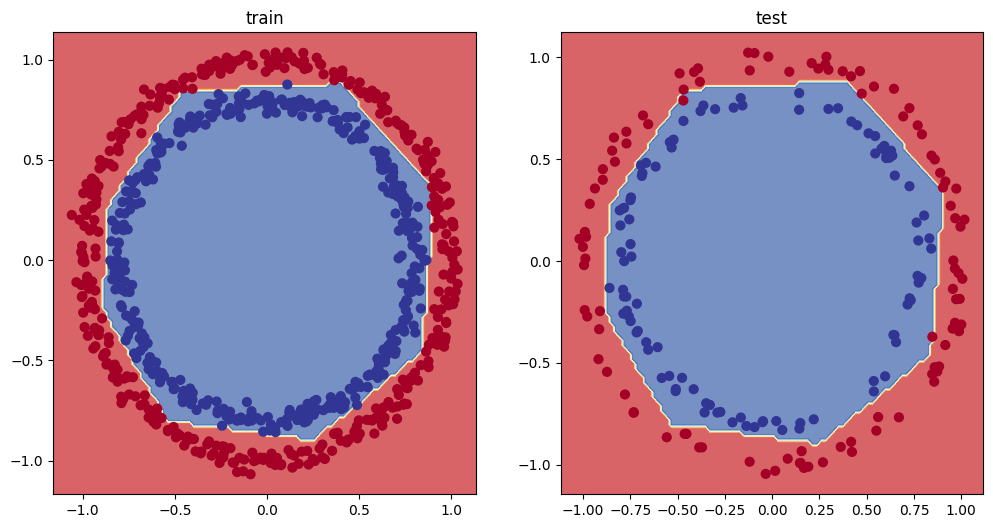

In [51]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_10, X_test, y_test)
plt.show()

## More classification methods, see below

**Other Classification metrics**

1. **Accuracy**
- Not great if there is class imbalance

2. **Precision**
- Higher precision leads to less false positives

3. **Recall**
- Higher recall leads to less false negatives

4. **F1 score**: Combination of precision and recall
- Good overall metrics for a classification model (balances both precision and recall)

5. **Confusion matrix**
- Used when comparing predictions to truth labels to see where model gets confused. Can be hard to use with large number of classes

In [52]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0993 - accuracy: 0.9900
Model loss on the test set: 0.09931442141532898
Model accuracy on the test set: 99.00%


How about a confusion matrix?

In [53]:
from sklearn.metrics import confusion_matrix

# Make predictions, neural network like predict a continuous value, for classification, its
# a bunch of probabilities
y_pred = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_pred))

7/7 [==============================] - 0s 1ms/step


array([[99,  2],
       [ 0, 99]], dtype=int64)

How about we beautify the confusion matrix?

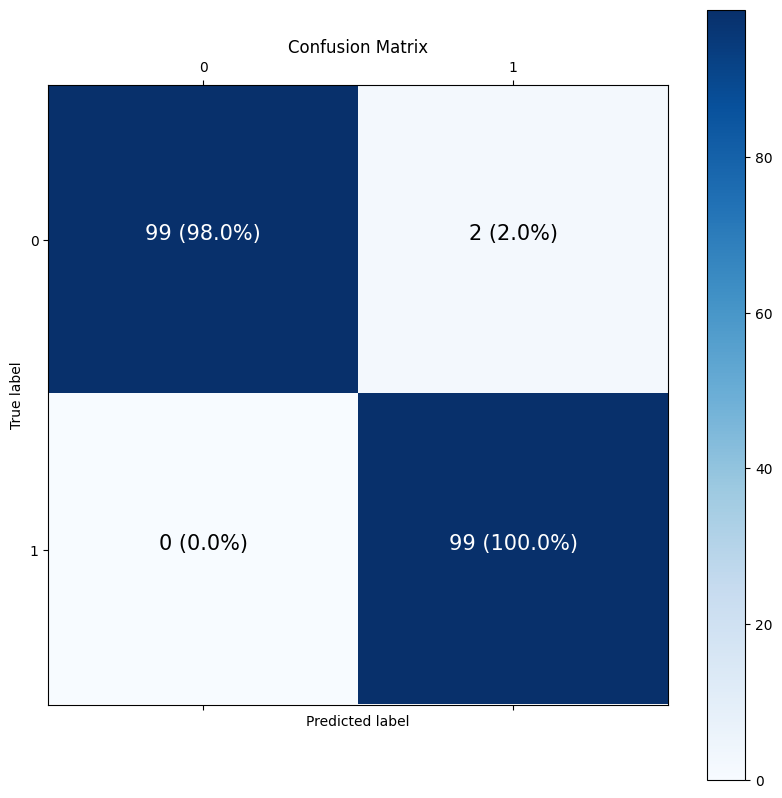

In [54]:
# Note: the confusion matrix code we are about to write is a remix of scikit's learn plot_confusion_matrix

import itertools

figsize = (10,10)

# Create the confusion matrix => will be a square matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0] # number of rows

# Beautify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
    
# Label the axes
ax.set(title='Confusion Matrix',
       xlabel='Predicted label',
       ylabel='True label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set threshold for different colours
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
             horizontalalignment='center', color='white' if cm[i,j] > threshold else 'black',
             size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**

* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [55]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [56]:
# Show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [57]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

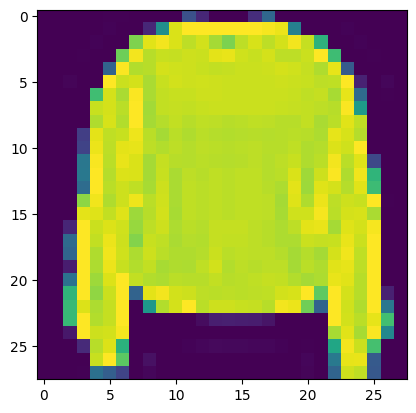

In [58]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [59]:
# Check out samples label
train_labels[7]

2

In [60]:
# Creating a small list so we can index onto training labels so they are easily understandable
class_names = ['T-shirt/top', 'Trouser', 'PUllover', 'Dress', 'Coat', 'Sandal', 'Shirt',
               'Sneaker', 'Bag', 'Ankle Boot']

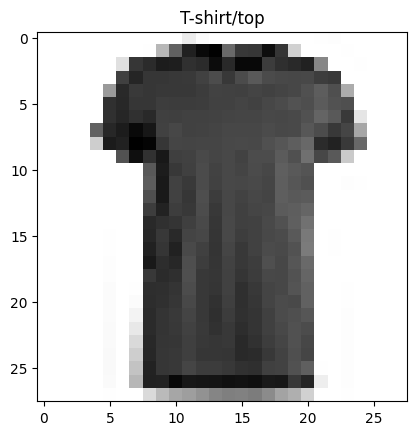

In [61]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])
plt.show()

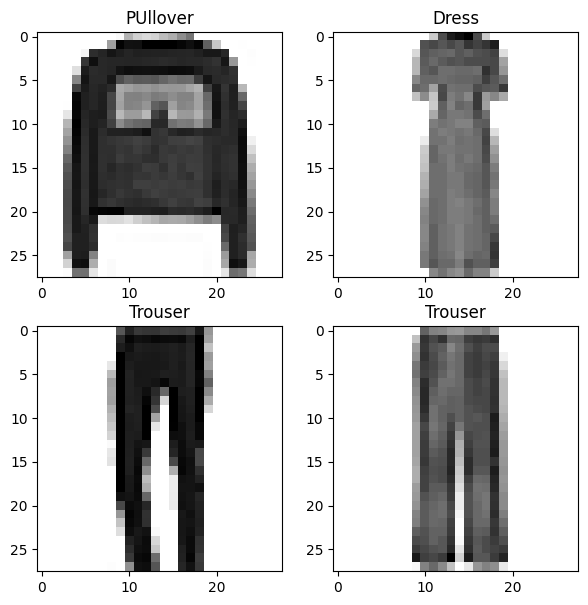

In [62]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])

## Building a multi-class classification model

For our multi-class classifciation model, we can use a similar architecture to our binary classification but we have to change a few things:

* Input shape = 28 x 28 (shape of 1 image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
    * If labels are one-hot encoded, use CategoricalCrossEntropy()
    * If labels are integers, use SparseCategoricalCrossEntropy()
* Output layer activation = Softmax (not sigmoid)

In [68]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer='adam',
                 metrics=['accuracy'])

# 3. Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0548 - accuracy: 0.1682 - val_loss: 1.7861 - val_accuracy: 0.2219
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7096 - accuracy: 0.2690 - val_loss: 1.6729 - val_accuracy: 0.2671
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6492 - accuracy: 0.2846 - val_loss: 1.6324 - val_accuracy: 0.2971
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6230 - accuracy: 0.2846 - val_loss: 1.6183 - val_accuracy: 0.2844
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6087 - accuracy: 0.2836 - val_loss: 1.6044 - val_accuracy: 0.2823
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5985 - accuracy: 0.2806 - val_loss: 1.5954 - val_accuracy: 0.2839
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5911 - accuracy: 0.2877 - val_loss: 1.5942 - val_accuracy:

In [64]:
# Check the model summary
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Check the min and max values ot the training_data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors to be between 0 & 1

In [66]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max vlaues of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [67]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer='adam',
                 metrics=['accuracy'])

# 3. Fit the model
norm_history = model_12.fit(train_data_norm, train_labels, epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1180 - accuracy: 0.5696 - val_loss: 0.8001 - val_accuracy: 0.7278
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7214 - accuracy: 0.7548 - val_loss: 0.7182 - val_accuracy: 0.7498
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6541 - accuracy: 0.7760 - val_loss: 0.6529 - val_accuracy: 0.7717
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6187 - accuracy: 0.7871 - val_loss: 0.6360 - val_accuracy: 0.7760
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6002 - accuracy: 0.7909 - val_loss: 0.6346 - val_accuracy: 0.7782
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5851 - accuracy: 0.7954 - val_loss: 0.6143 - val_accuracy: 0.7868
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5787 - accuracy: 0.7987 - val_loss: 0.6153 - val_accuracy:

**Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1)

<AxesSubplot: title={'center': 'Normalized data'}>

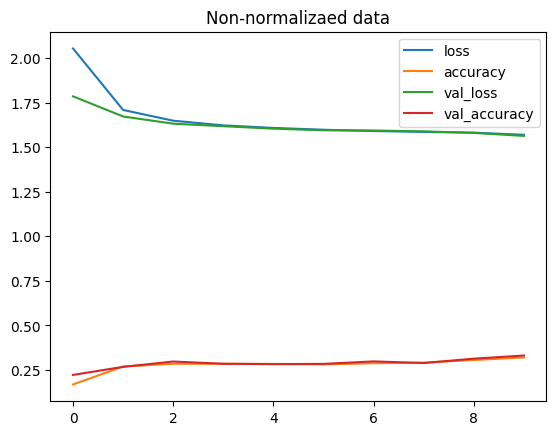

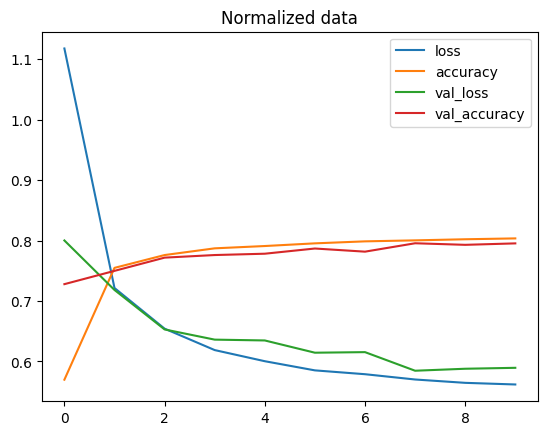

In [69]:
import pandas as pd

# Plot the non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-normalizaed data')
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')

**Note:** The same model with even *slightly* different data, can produce *dramatically* different results. So when comparing models, it's important to make sure you're comparing them on the same criteria (e.g same architecture but different data or same data but different architecture)

## Finding the ideal learning rate

In [70]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer='adam',
                 metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm, train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4495 - accuracy: 0.4658 - val_loss: 1.1283 - val_accuracy: 0.5926 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0249 - accuracy: 0.6284 - val_loss: 0.9718 - val_accuracy: 0.6598 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8946 - accuracy: 0.6805 - val_loss: 0.8527 - val_accuracy: 0.6985 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8062 - accuracy: 0.7096 - val_loss: 0.7930 - val_accuracy: 0.7185 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7581 - accuracy: 0.7222 - val_loss: 0.7567 - val_accuracy: 0.7281 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7302 - accuracy: 0.7322 - val_loss: 0.7479 - val_accuracy: 0.7347 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

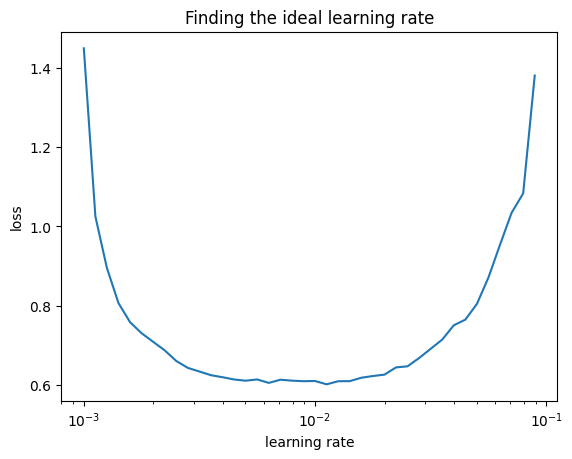

In [71]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

'''
Ideal learning rate can be found in the range between
1. The part of the curve that decreases the most (sharpest descent)
2. The lowest point on the curve
'''

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('Finding the ideal learning rate')

In [72]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

# Fit model
history_14 = model_14.fit(train_data_norm, train_labels, epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0976 - accuracy: 0.5765 - val_loss: 0.7906 - val_accuracy: 0.7291
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7312 - accuracy: 0.7490 - val_loss: 0.7270 - val_accuracy: 0.7500
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6747 - accuracy: 0.7700 - val_loss: 0.6667 - val_accuracy: 0.7721
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6476 - accuracy: 0.7781 - val_loss: 0.6533 - val_accuracy: 0.7741
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6305 - accuracy: 0.7817 - val_loss: 0.6380 - val_accuracy: 0.7822
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6179 - accuracy: 0.7871 - val_loss: 0.6399 - val_accuracy: 0.7806
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6095 - accuracy: 0.7912 - val_loss: 0.6358 - val_accuracy:

## Evaluating multi-class classification model

To evaluate the multi-class classification model, we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

In [74]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

figsize = (10,10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
    # Create the confusion matrix => will be a square matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0] # number of rows

    # Beautify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
        
    # Label the axes
    ax.set(title='Confusion Matrix',
        xlabel='Predicted label',
        ylabel='True label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set threshold for different colours
    threshold = (cm.max() + cm.min()) / 2

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
                horizontalalignment='center', color='white' if cm[i,j] > threshold else 'black',
                size=text_size)

In [76]:
# Make some predictions with our model
y_prob = model_14.predict(test_data_norm) # output will be prediction probabilities

# View the first 5 predictions
y_prob[:5]

313/313 [==============================] - 1s 2ms/step


array([[6.1997170e-08, 6.2687601e-25, 3.1052476e-12, 5.4473315e-09,
        4.0002315e-10, 2.6776499e-01, 6.1776996e-07, 6.0187932e-02,
        9.5918262e-04, 6.7108721e-01],
       [3.1964929e-04, 2.9829843e-07, 7.6854861e-01, 4.3857458e-08,
        1.6622226e-01, 5.2526854e-27, 6.4908206e-02, 0.0000000e+00,
        9.3202038e-07, 0.0000000e+00],
       [2.9611147e-05, 9.9922860e-01, 1.1084728e-04, 6.2742090e-04,
        6.4567848e-07, 7.4949302e-13, 2.8869658e-06, 2.2727045e-24,
        1.9173789e-09, 4.7629755e-25],
       [2.7067715e-04, 9.9229139e-01, 8.4270345e-04, 6.5138894e-03,
        2.3158394e-05, 1.9275044e-09, 5.8068206e-05, 1.2611425e-17,
        1.5255537e-07, 1.1250810e-18],
       [1.2438374e-01, 1.7658318e-06, 1.2852891e-01, 6.6773556e-03,
        4.9830981e-02, 1.9126617e-10, 6.8051308e-01, 1.1607263e-31,
        1.0064186e-02, 1.1615581e-25]], dtype=float32)

In [79]:
# Convert all the prediciton probabilties into integers
y_pred = y_prob.argmax(axis=1)

# View the first 10 prediction labels
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [80]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_pred)

array([[646,   0,  12, 136,   8,   1, 185,   0,  12,   0],
       [  1, 954,  11,  26,   7,   0,   1,   0,   0,   0],
       [ 15,  10, 657,  12, 224,   0,  82,   0,   0,   0],
       [ 36,  22,  20, 827,  33,   2,  58,   0,   2,   0],
       [  0,   5,  90,  23, 828,   1,  50,   0,   3,   0],
       [  0,   0,   0,   4,   0, 898,   0,  47,  15,  36],
       [106,   0, 117,  76, 217,   0, 474,   0,  10,   0],
       [  0,   0,   0,   0,   0,  51,   0, 901,   0,  48],
       [  1,   0,   2,   9,   4,  25,  71,   3, 884,   1],
       [  0,   0,   0,   0,   0,  37,   0,  40,   5, 918]], dtype=int64)

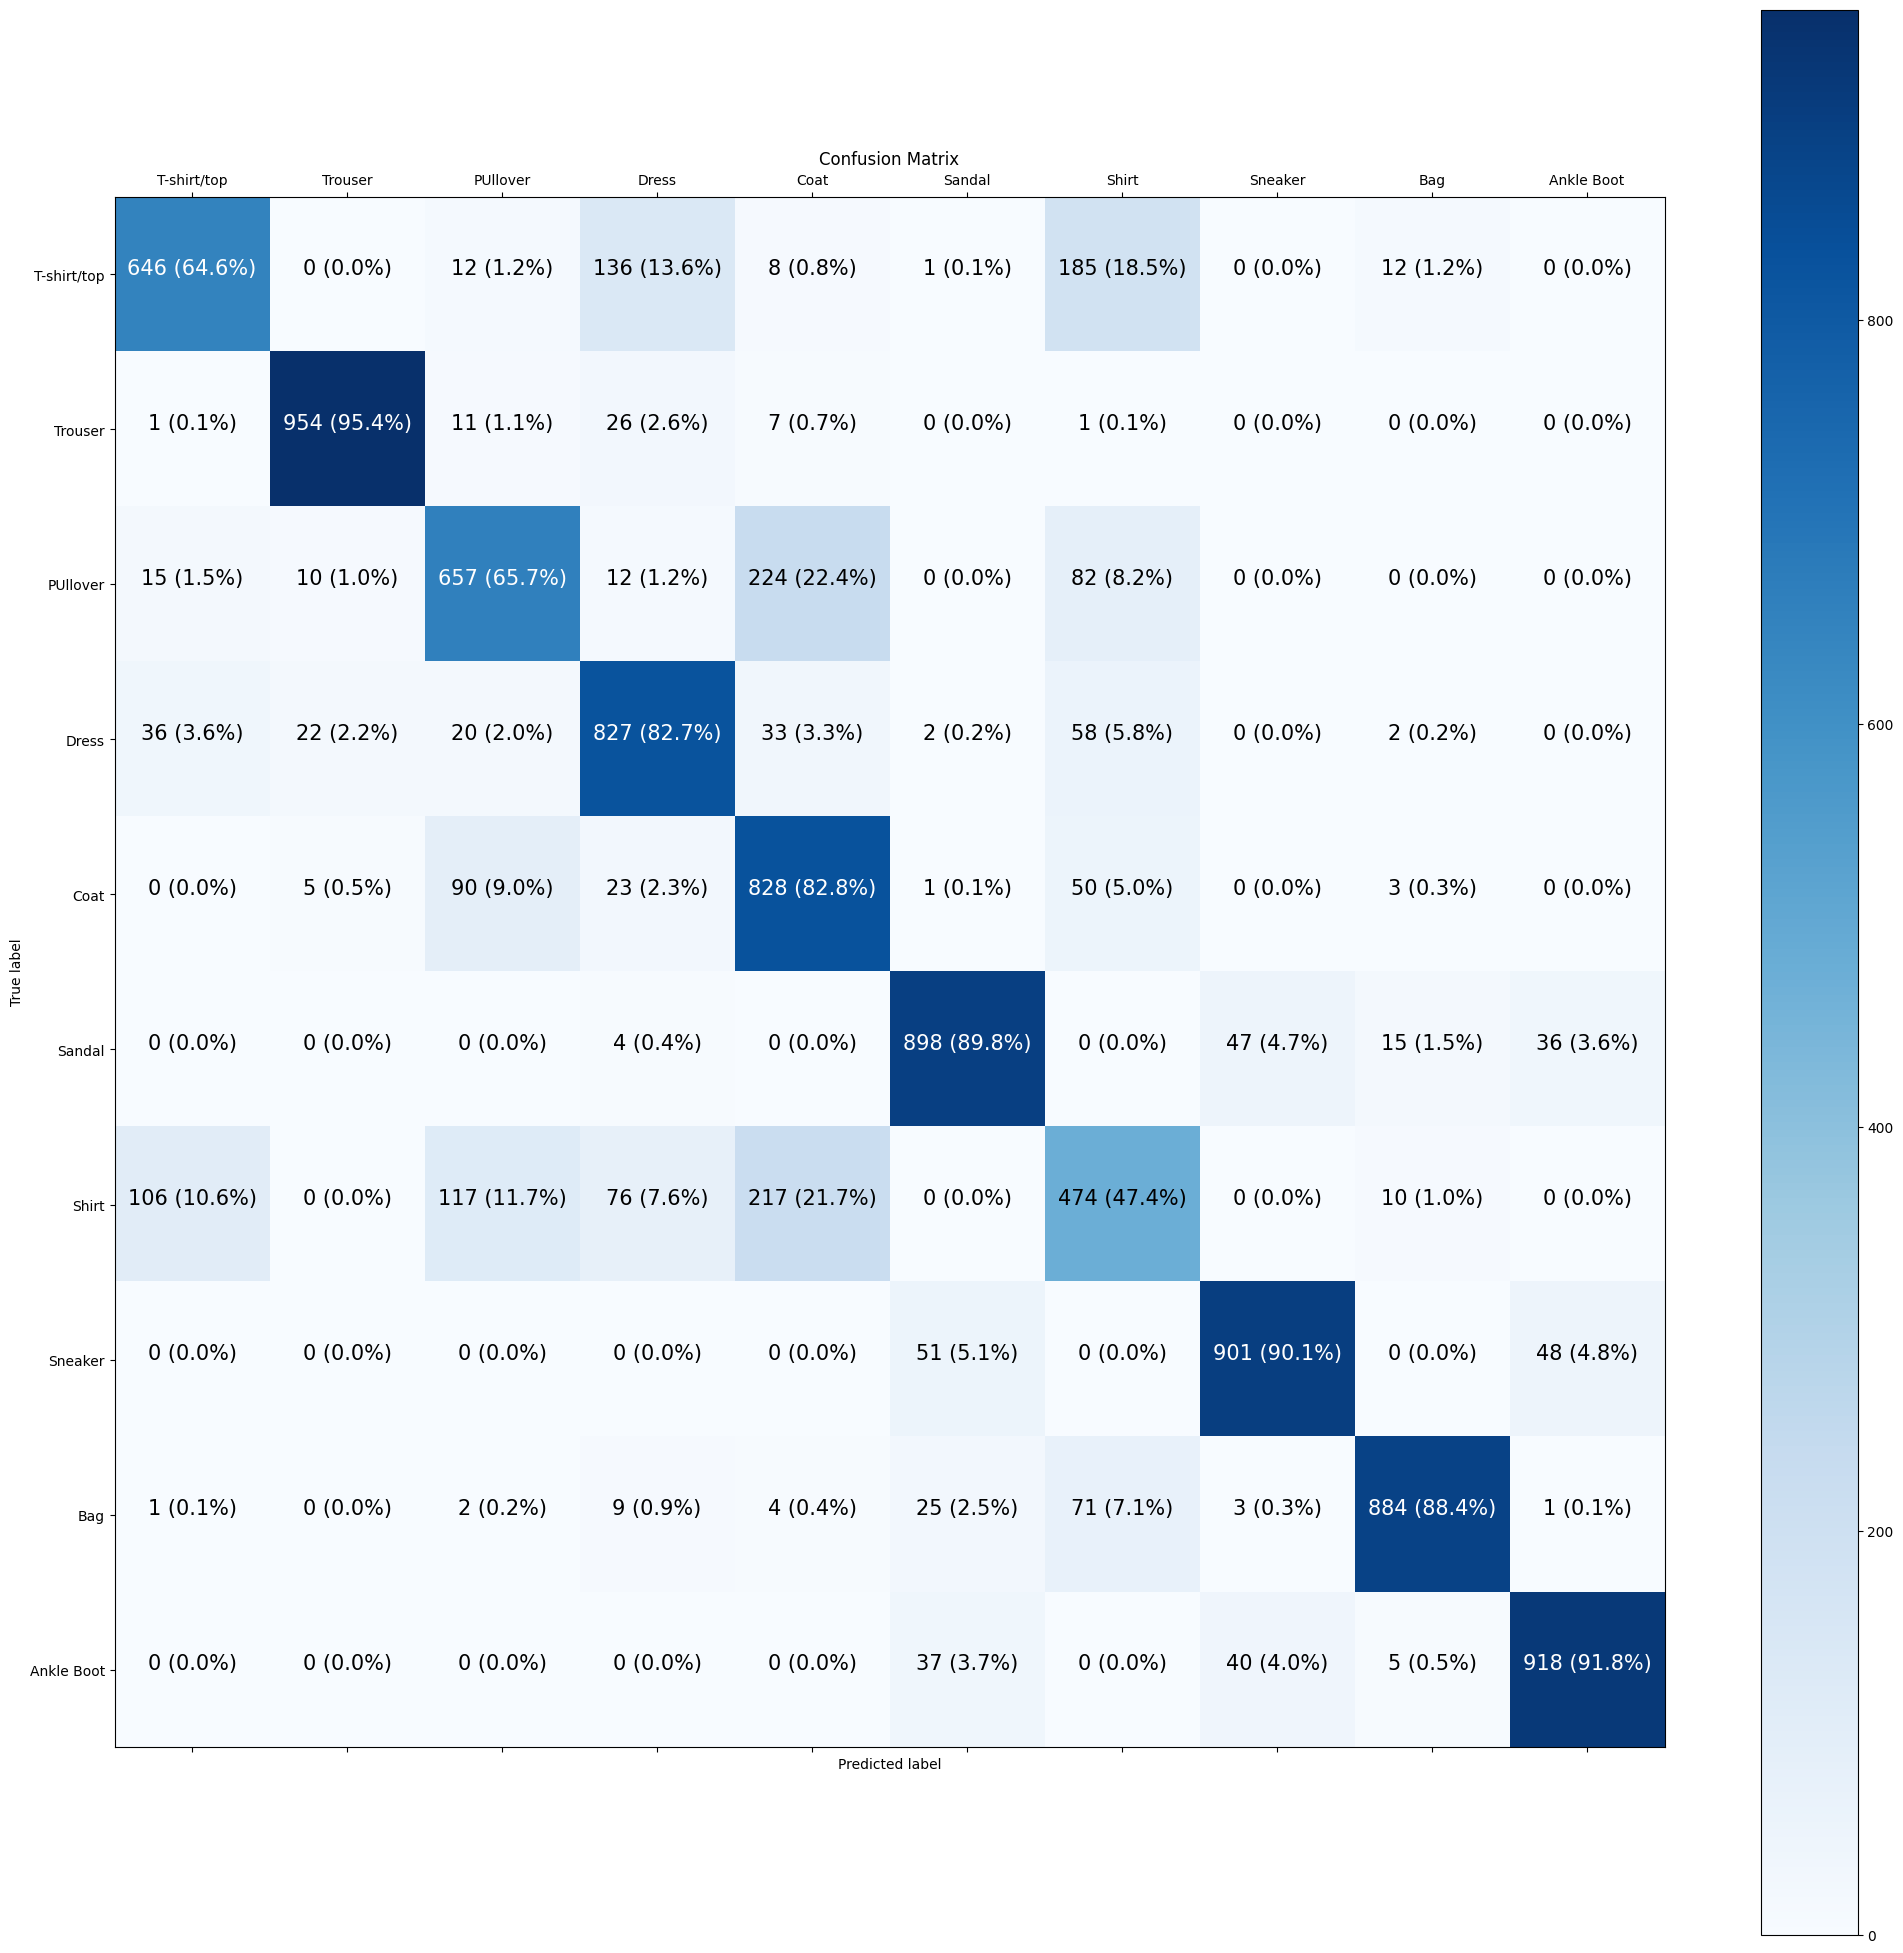

In [86]:
# Make a nicer confusion matrix
make_confusion_matrix(y_true=test_labels, y_pred=y_pred,
                      classes=class_names, figsize=(25,25))

**Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a futher understanding of the data nad the inputs and outputs of models.

How about we create a function for:
* Plot a random image
* Make a prediction on said iamge
* Label the plot with the truth label & predicted label

In [87]:
import random

def plot_random_image(model, images, true_labels, classes):
    '''
    Picks a random image, plots it and labels it with a prediction and truth label
    '''
    # set up random integer
    i = random.randint(0, len(images))
    
    # create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Change the colour of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        colour = 'green'
    else:
        colour = 'red'
        
    # Add xlabel information (prediction/true label)
    plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label, 100*tf.reduce_max(pred_probs),
                                                     true_label), color=colour)

1/1 [==============================] - 0s 26ms/step


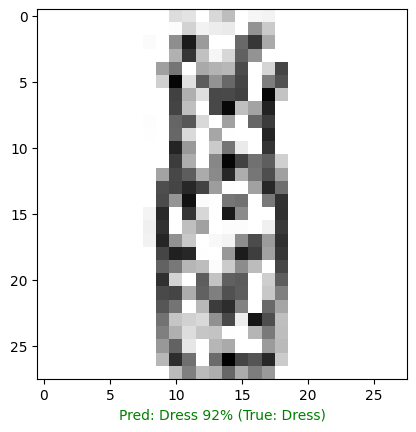

In [92]:
# Check out a randome image as well as its prediction
plot_random_image(model=model_14, images=test_data_norm, # always make predictions on the same kind of data the model was trained on
                  true_labels=test_labels, classes=class_names)

## What patterns is our model learning?

In [93]:
# Find the layers of our most recent model
model_14.layers

In [94]:
# Extract a particular layer
model_14.layers[1]

In [96]:
# Get the patterns of a layer in a our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.16790518,  0.03692217, -0.31348935, -0.16986255],
        [-0.61157364, -0.21076262,  0.13987434, -0.9593244 ],
        [-0.6982034 , -0.51049787,  0.6391673 , -0.26708242],
        ...,
        [-0.36803856, -0.7727872 , -0.04911545, -0.42617923],
        [-0.02646299, -1.2669878 , -0.52302873,  0.11533121],
        [-0.32877234, -0.85058403, -0.03427954,  0.16694175]],
       dtype=float32),
 (784, 4))

Now let's check our the bias vector

In [97]:
# Bias and biases shapes
biases, biases.shape

(array([0.9161078 , 1.6588771 , 1.386059  , 0.60669297], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of TensorFlow Dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

In [98]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


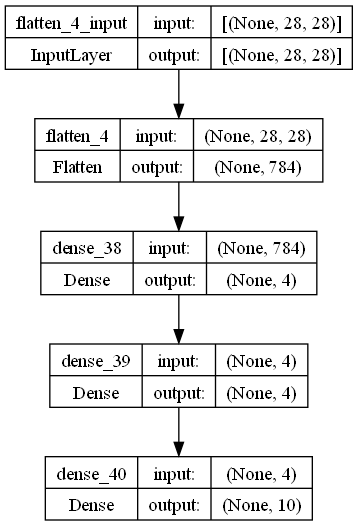

In [99]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)